<div>
<h1>Solve Xporters traffic volume problem</h1>
    <span   style="color:green">  <h2> SEGWAY Group</h2>    </span>
<em><font size="-2">Organisers : Alexis de Russ&eacute;, Florian Bertelli, Gaspard Donada--Vidal, Ghassen Chaabane, Moez Ezzeddine, Ziheng Li</font></em>
<hr>

<p><br>This code was tested with Python 3.7 |Anaconda custom (64-bit)| (Oct 01 2019, 11:07:29) (<a href="https://anaconda.org/">https://anaconda.org/</a>).<br>
<font size="-3">ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</font></p></div>

<div>
    <h2>Introduction </h2>
    <p>
With globalization, our world tends to be more and more connected, so this implies more and more transport. There
 are various types of transports: transports of goods, energy, information, or people.This century will be marked by a revolution in the transport of people. With the development of autonomous cars, more and more data will be collected: speed, location, population,etc. The challenge is to get value from this. As the number of cars, and particularly autonomous cars tends to grow, we'll need to deal with an increasing traffic flow to avoid huge traffic jams. Indeed, some experts pretend that autonomous vehicles will be able to reduce travelling timeup to 30%, even if the world traffic increases of 10%.
But how is it possible to reduce travelling time and traffic jams if the number of vehicles increases ? Thanks to prediction. <br>
        In fact, prediction will be the key to determine the fastest way to get you from your home to your work, without getting in traffic jams. Predictions may also be used to determine which transportation infrastructures to
build.
            <p>
Xporters challenge is a small standard multivariable regression data set from the <a href="http://archive.ics.uci.edu/ml/datasets/">UCI Machine Learning Repository</a>, formatted in the AutoML format. It uses a data set concerning the traffic volume off an highway in the USA from 2012 to 2018, the date, and some informations about the weather. The aim of this challenge is to predict the traffic volume thanks to this features
</p>
    </div>
    

<h6>Importing relevant supplies </h6>

In [1]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
import sklearn as sk
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
model_dir = './sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = './sample_result_submission/' 
problem_dir = './ingestion_program/'  
score_dir = './scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
sns.set()

In [3]:

from libscores import get_metric
metric_name, scoring_function = get_metric()
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

<div>
    <h1> Step 1: Exploratory data analysis </h1>

</div>

In [4]:
from data_io import read_as_df
data_dir = './all_data'          # The sample_data directory should contain only a very small subset of the data
data_name = 'xporters'
!pwd
!ls $data_dir*

/home/guayaba/Segway/starting_kit
xporters_feat.name     xporters_test.data	xporters_valid.data
xporters_private.info  xporters_train.data
xporters_public.info   xporters_train.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [5]:
data = read_as_df(data_dir  + '/' + data_name)             # The data are loaded as a Pandas Data Frame

Reading ./all_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


<p> <span style="color:green"> First it is important to know the features and datas we are working  </p> <span>

In [6]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
0,0,267.510,0.0,0.0,40,85.821965,6,1,12,2017,...,0,0,0,0,0,0,0,0,0,759.0
1,0,293.720,0.0,0.0,90,72.271517,5,11,6,2018,...,0,0,0,0,0,0,0,0,0,4085.0
2,0,302.180,0.0,0.0,0,65.922514,1,19,7,2013,...,0,0,0,0,0,0,0,0,0,3528.0
3,0,255.580,0.0,0.0,75,90.673493,1,5,2,2014,...,0,0,0,0,0,0,0,0,0,2636.0
4,0,286.381,0.0,0.0,0,97.325080,2,18,10,2016,...,0,0,0,0,0,0,0,0,0,4226.0


In [7]:
data.describe() 

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,...,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,0.001245,281.197804,0.379081,0.000203,49.350284,80.079942,2.984311,11.408578,6.518009,2015.510645,...,0.000337,0.005990,0.002515,0.000052,0.001167,0.000363,0.001193,0.000856,0.000415,3258.740788
std,0.035259,13.239935,50.073028,0.007602,39.029958,9.992938,2.003339,6.947282,3.405988,1.892133,...,0.018358,0.077165,0.050091,0.007202,0.034141,0.019050,0.034518,0.029241,0.020365,1987.121630
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.724760,0.000000,0.000000,1.000000,2012.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,73.343967,1.000000,5.000000,4.000000,2014.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1195.000000
50%,0.000000,282.341000,0.000000,0.000000,64.000000,80.134711,3.000000,11.000000,7.000000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3377.000000
75%,0.000000,291.790000,0.000000,0.000000,90.000000,86.771668,5.000000,17.000000,9.000000,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4933.000000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,128.465356,6.000000,23.000000,12.000000,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7260.000000


  <p> <span style="color:green"> Target traffic is a main data feature. We want that our regressor model preddicts results like we have at the beginning on our target row. </span>  </p>
    

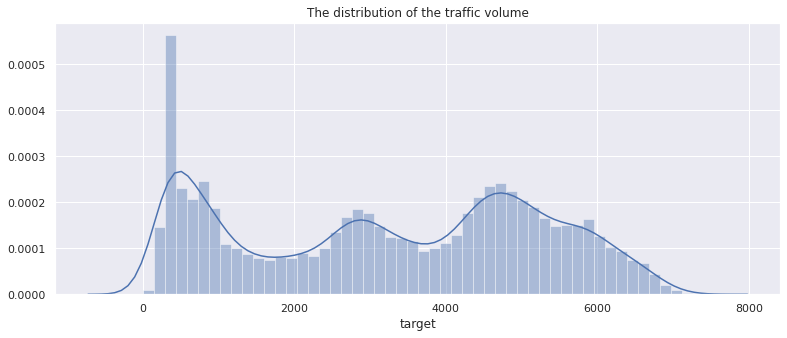

In [8]:
plt.figure(figsize = (13,5))
sns.distplot(data['target'], bins=50)
plt.title('The distribution of the traffic volume')
plt.show()

<p> <span   style="color:green"> In this graph about the distribution of the traffic volume. The bscissa of 7000 datas may be interpreted like the timeduring the day: sharped and concentrated during the morging, midday and  at the afternoon. <span>

<span   style="color:green">We espect our results would be look like this</span>   </p>
    

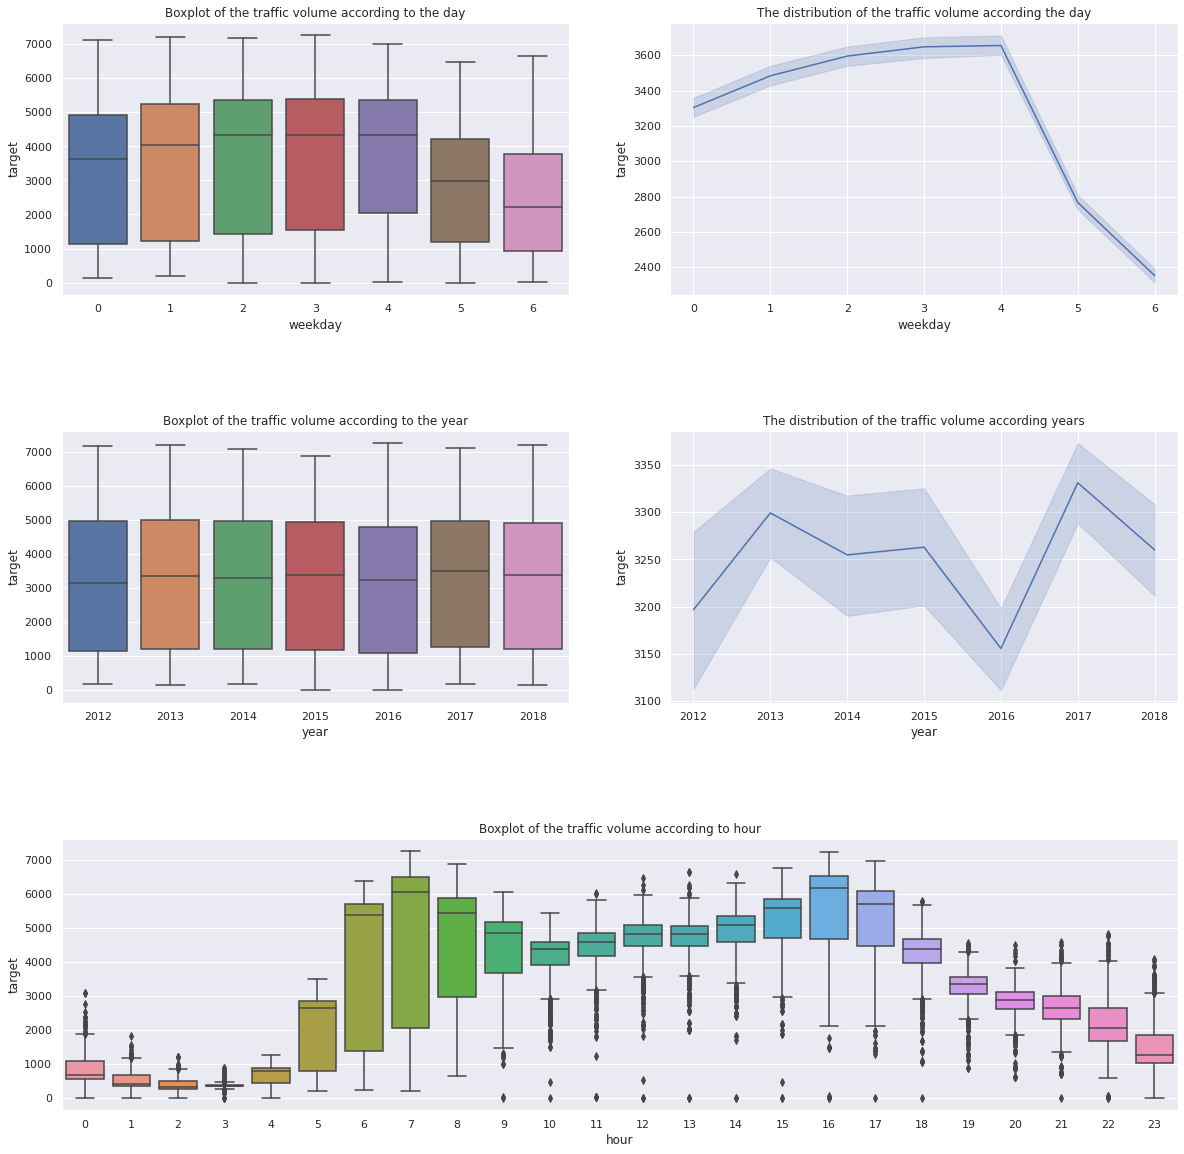

In [9]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(313)
sns.boxplot('hour','target', data= data)
plt.title('Boxplot of the traffic volume according to hour')

plt.subplot(321)
sns.boxplot('weekday','target', data= data)
plt.title('Boxplot of the traffic volume according to the day')
plt.subplot(322)
sns.lineplot('weekday','target', data= data)
plt.title("The distribution of the traffic volume according the day")

plt.subplot(323)
sns.boxplot('year','target', data= data)
plt.title('Boxplot of the traffic volume according to the year')
plt.subplot(324)
sns.lineplot('year','target', data= data)
plt.title("The distribution of the traffic volume according years")
plt.show()

Text(0.5, 1.0, 'Violinplot of the traffic volume according to the day')

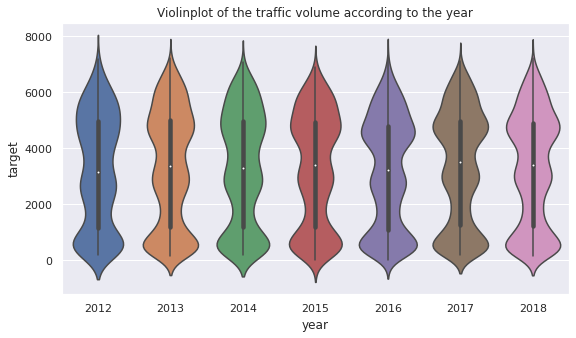

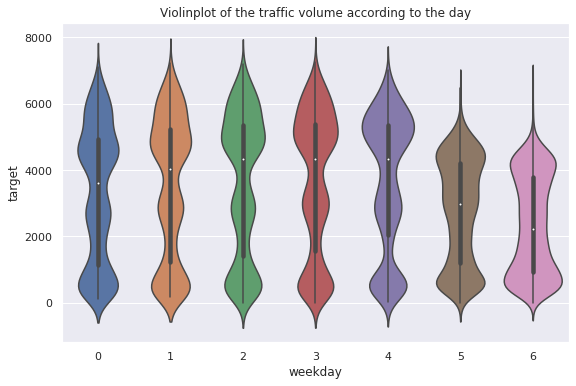

In [10]:
fig = plt.figure(figsize=(20,20))


#Représentation en forme des violons, on approfondit sur la quantité de traffic pendant l'année
fig.subplots_adjust(hspace = 0.5)
plt.subplot(321)
sns.violinplot('year','target', data= data)
plt.title('Violinplot of the traffic volume according to the year')
fig = plt.figure(figsize=(20,20))
#Représentation en forme des violons, on approfondit sur la quantité de traffic en fonction du jour de la semaine
plt.subplot(322)
sns.violinplot('weekday','target', data= data)
plt.title('Violinplot of the traffic volume according to the day')




<h1> <span   style="color:green"> Testing pertinent features </span> </h1>

<span   style="color:green"> First we visualize how frames are important for our study.Nevertheless, we chosed different features , explained after</span>

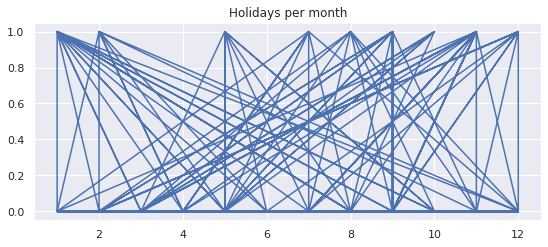

In [11]:
""" Testing pertinent features, Holiday importance  """
plt.figure(figsize=(20,8))
plt.subplot(222)
plt.plot(data['month'], data['holiday'])
plt.title("Holidays per month")
plt.show()

<span   style="color:green"> Relation between holidays and time on the year </span>

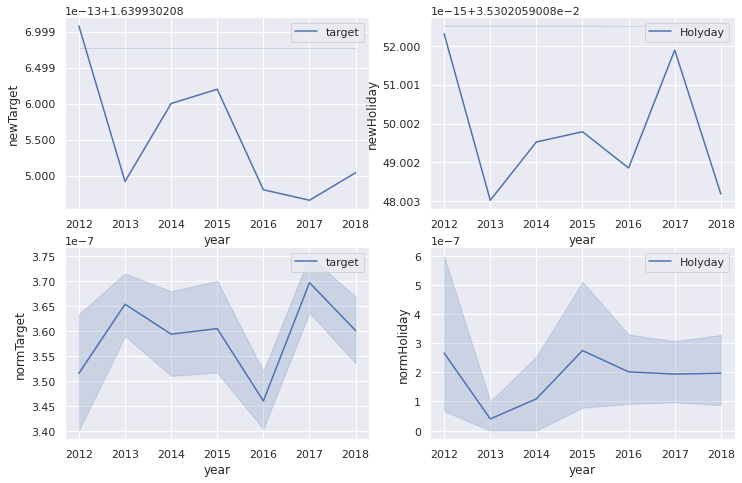

In [12]:

"""Normalize with mean : newTarget and new Holiday"""


data['newTarget'] =  data['target' ].mean()/data['target' ].std()
data['newHoliday']=((data['holiday'].mean()/data['holiday'].std()))


"""Normalize values and overleaf of holidays and target with max and min"""


minData =min([data['target'].min(),data['holiday'].min()])
maxData= max([data['target'].max() ,data['holiday'].max()])
data['normTarget'] = ((data['target']-minData )/(maxData-minData)*9.8e-7)-0.8*1e-7
data['normHoliday'] = (data['holiday']-minData )/(maxData-minData)

######       AFFICHAGE       #######
plt.figure(figsize=(12,12))

plt.subplot(321)
sns.lineplot('year','newTarget', data= data,label='target')
plt.subplot(322)
sns.lineplot('year','newHoliday', data= data,label='Holyday')


plt.subplot(323)
sns.lineplot('year','normTarget', data= data,label='target')
plt.subplot(324)
sns.lineplot('year','normHoliday', data= data,label='Holyday')
plt.show()



<span   style="color:green"> Target and Holiday frames have opposite behaviors </span>

<h2> <span   style="color:green">  
     How to see the relevance of features compared to target, our main data value? </span> </h2>
Representing the difference between features and the target
    

In [13]:
def feature_relevance_plot(d_feat, d_target, data,time):
    """ d_feat  : is the dataframe of feature to mesure its relevance and 
        d_target: is just the dataframe from the featur of target 
        data    : panda data to study values
        time    : time ax X comparison of d_feat and d_tarrget 
        THey must have the same frame size
        @return : difference of both param values and representation of this difference"""
    
    data2=data.copy()
    
    ####not very relevant calcul to evaluate, false representation
    data2[d_target]=sk.preprocessing.normalize(data,norm='l2')
    #print(data2)
        
    #data2['rest']= abs(data[d_target ]-data[d_feat])
    plt.figure(figsize=(12,12))
    """plt.subplot(321)
    #sns.distplot(data[d_feat])
    sns.lineplot(time,d_target,data=data2,label='Normalized {}'.format(d_target))
    """
    plt.subplot(321)
    sns.lineplot(time,d_target,data=data,label=d_target)
    #sns.lineplot('year','newTarget', data= data,label='target')
    plt.title('{} Distribution '.format(d_target))
    
    plt.subplot(322)
    sns.lineplot(time,d_feat,data=data,label=d_feat)
    plt.title('{} Distribution '.format(d_feat))
    #plt.plot(data['month'], data['holiday'])
    #plt.title("Holiday per month")
    ## Calculs de différence
    data2[d_feat]=sk.preprocessing.normalize(data, norm='l2')
    """plt.subplot(323)
    sns.lineplot(time,d_feat,data=data2,label='Normalized {}'.format(d_feat))
"""    #sns.lineplot(time,'rest',data=data2,label='difference')
    #plt.title('Difference of {} and {} per {}'.format(d_feat,d_target,time))
    #return np.abs(d_feat,d_target)
    """plt.figure(figsize=(20,10))
    plt.subplot(325)
    plt.plot(data[d_feat],data[time],'*',label=d_feat)
    plt.plot(data[d_target],data[time],'+',label=d_target)
    plt.show()"""

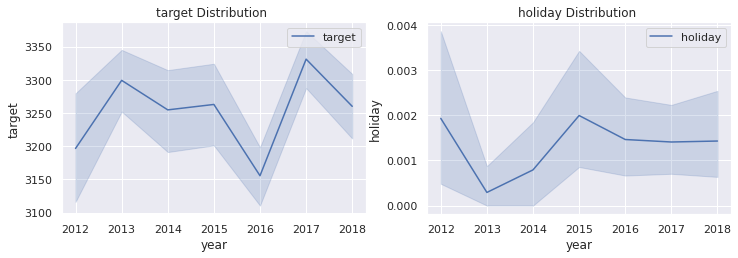

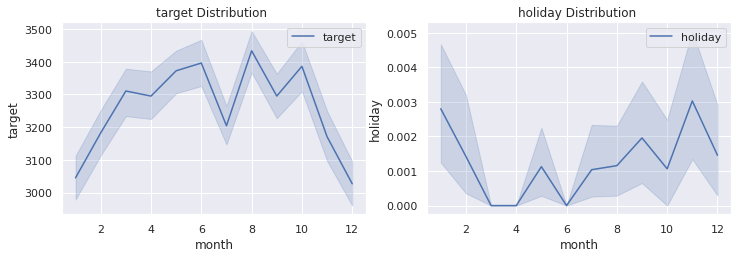

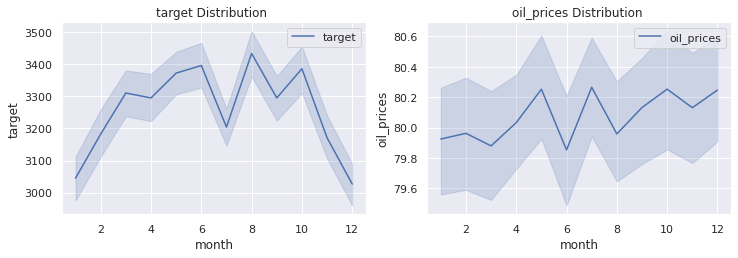

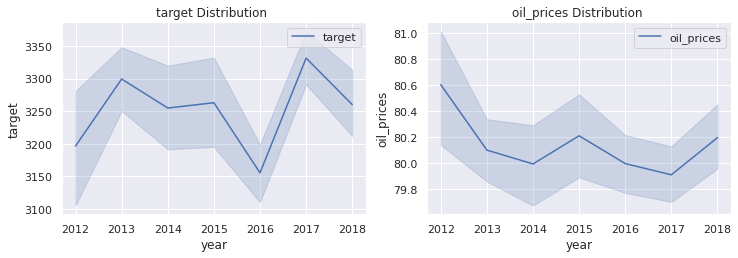

In [14]:
feature_relevance_plot('holiday','target',data,'year')
feature_relevance_plot('holiday','target',data,'month')
feature_relevance_plot('oil_prices','target',data,'month')
feature_relevance_plot('oil_prices','target',data,'year')

<span   style="color:green">  With these curves we can see a logical relation between traffic and oil prices as well as between vacation feature. </span>

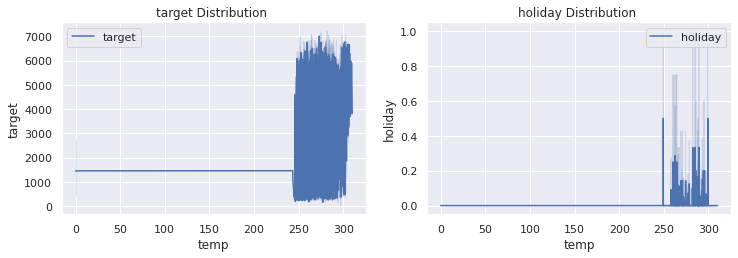

In [15]:
#Testing function
feature_relevance_plot('holiday','target',data,'temp')


Text(0.5, 1.0, 'Linplot of the traf')

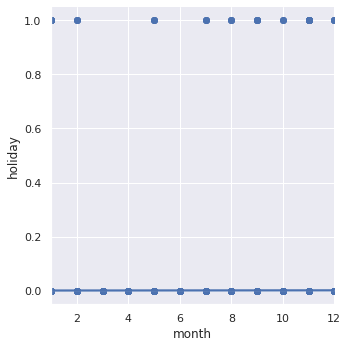

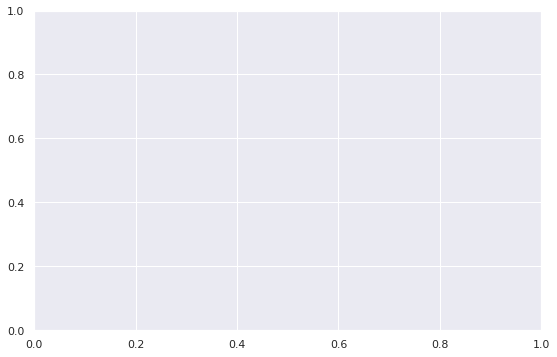

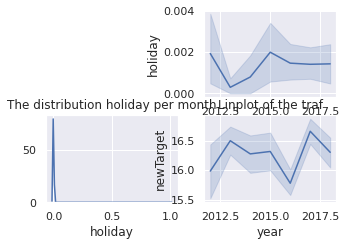

In [16]:
### filtered_class = car_data[cdata['modelLine'] != 'AVANTGARDE']
#tips = sns.load_dataset(data)
g = sns.lmplot(x="month", y="holiday", data=data,
               palette=dict(Yes="g", No="m"))
sns.set(color_codes=True)
#help(sns.lmplot)
#sns.lmplot('holiday',data=data['target'],hue="year", fit_reg=False, col='target', col_wrap=2)
#sns.lmplot("equipment", "price", data=filtered_class, hue="gears", fit_reg=False, col='modelLine', col_wrap=2)
fig = plt.figure(figsize=(20,20))
plt.subplot(325)
sns.catplot('year','holiday', data= data)
plt.subplot(322)
sns.lineplot('year','holiday', data= data)
plt.subplot(323)
sns.distplot(data['holiday'],hist=False,bins = 50)
plt.title("The distribution holiday per month")
plt.subplot(324)
data2=data
data2['target']= [i/100 for i in data['target']] 
data['newTarget']=data['target']/2
sns.lineplot('year','newTarget', data= data)
plt.title('Linplot of the traf')

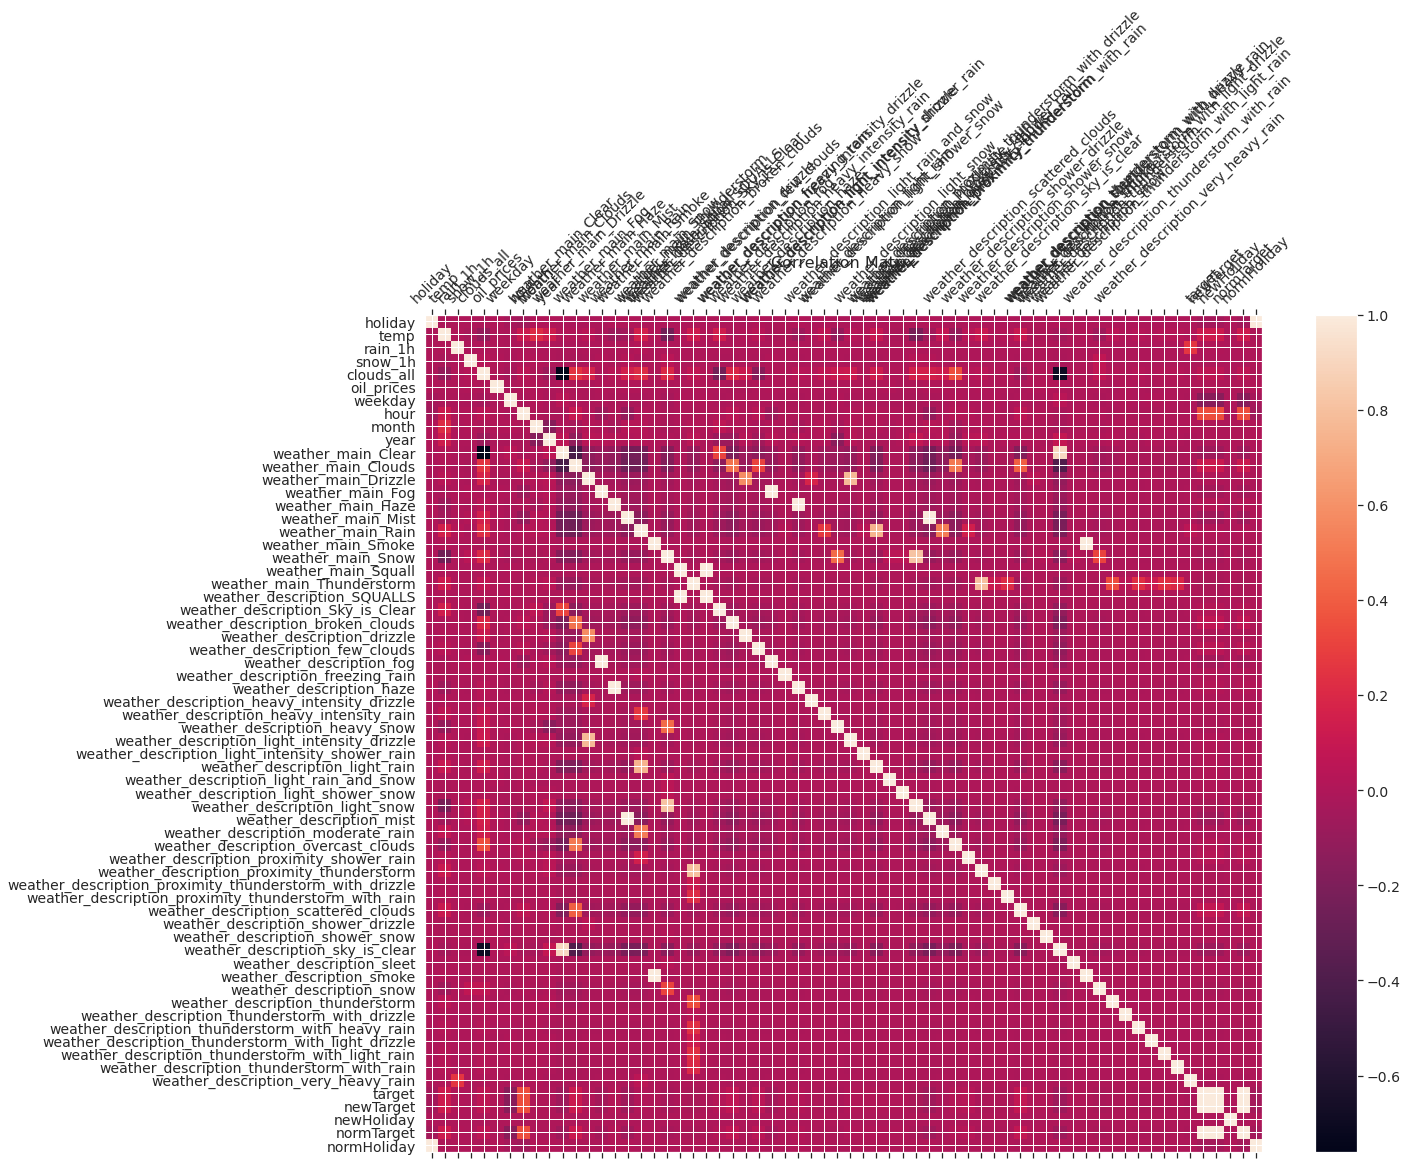

In [17]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [18]:
print('Most important features according to the correlation with target')
most_important_features = data.corr()['target'].sort_values(ascending=False)[:10]
print (data.corr()['target'].sort_values(ascending=False)[:10], '\n')

Most important features according to the correlation with target
newTarget                               1.000000
target                                  1.000000
normTarget                              1.000000
hour                                    0.350545
temp                                    0.131803
weather_main_Clouds                     0.119544
weather_description_scattered_clouds    0.083946
weather_description_broken_clouds       0.065639
clouds_all                              0.064201
weather_description_few_clouds          0.044360
Name: target, dtype: float64 



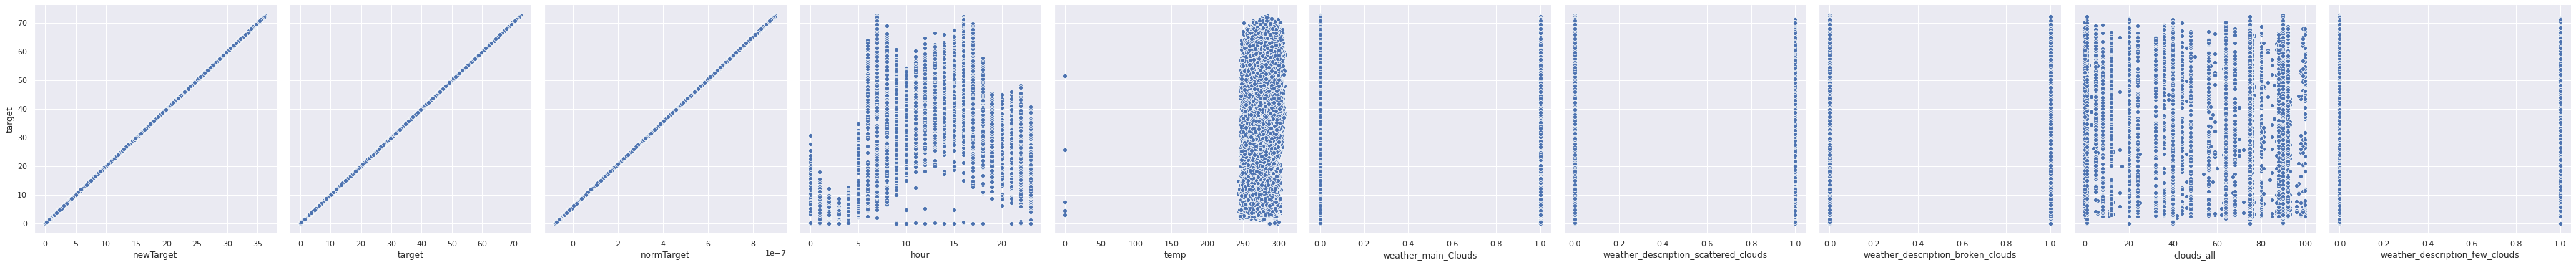

In [19]:
a = list(most_important_features.index)
sns.pairplot(data,height= 5, x_vars = a , y_vars = 'target')
plt.show()


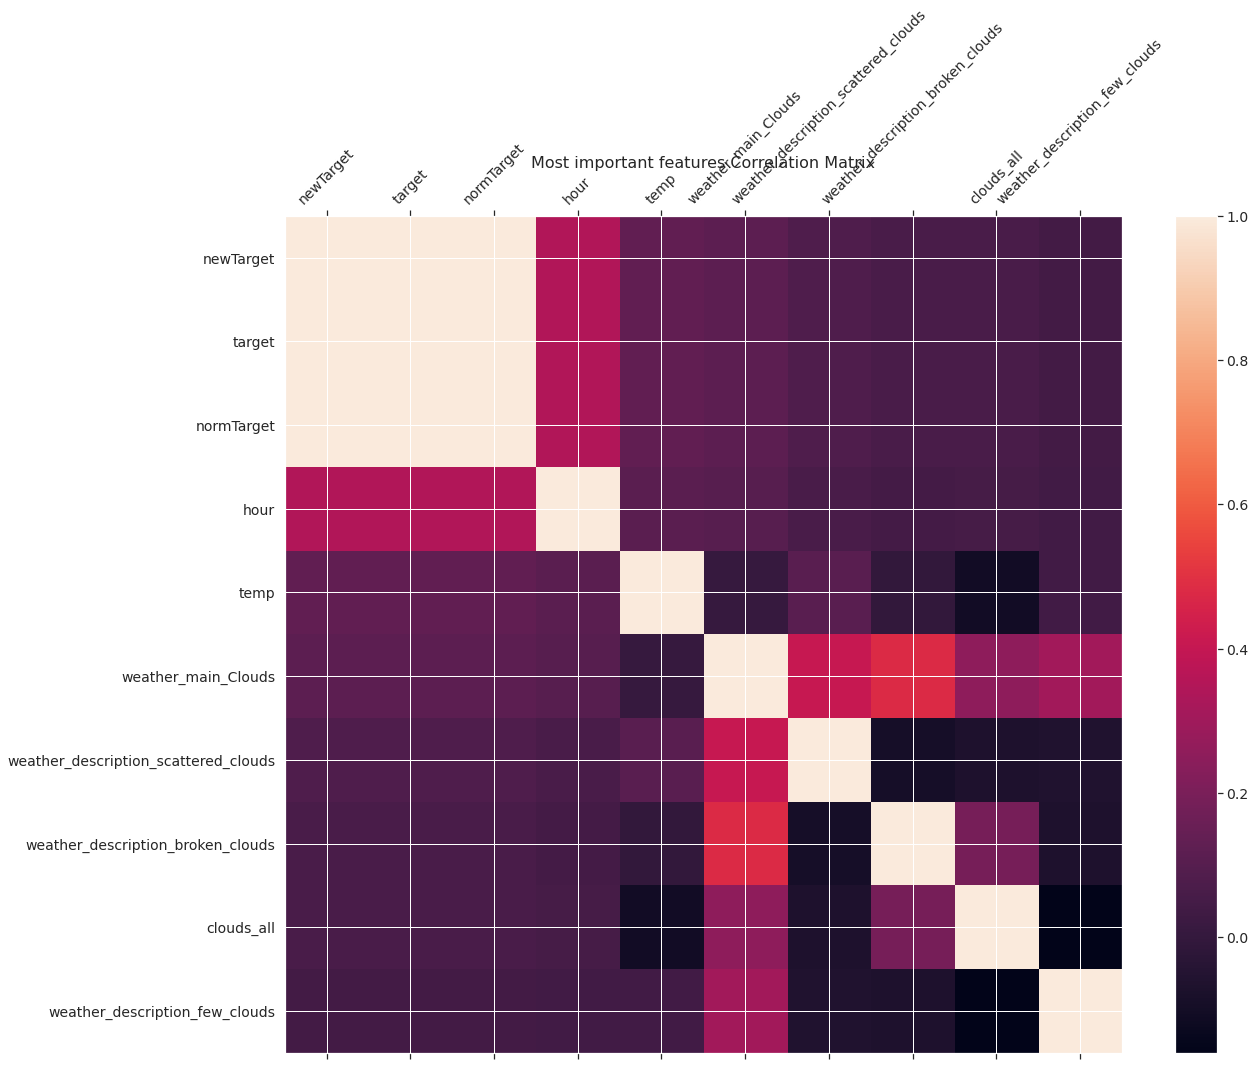

In [20]:
data_MIF = data.filter(most_important_features.keys())

f = plt.figure(figsize=(19, 15))
plt.matshow(data_MIF.corr(), fignum=f.number)
plt.xticks(range(data_MIF.shape[1]), data_MIF.columns, fontsize=14, rotation=45)
plt.yticks(range(data_MIF.shape[1]), data_MIF.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Most important features Correlation Matrix', fontsize=16);

<span   style="color:green">  Visulazing the most direct important features</span>

<div>
<h1>Step 2: Building a predictive model</h1>
</div>

<div>
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:
   <br>     <span style="color:red"> Keep this, it illustrates how data in AutoML formal are loaded by the ingestion program </span>
</div>

In [21]:
# Read Data
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)

Info file found : /home/guayaba/Segway/starting_kit/all_data/xporters_public.info


<div>
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [22]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)

model_dir = './sample_code_submission/'
result_dir = './sample_result_submission/' 
problem_dir = './ingestion_program/'  
score_dir = './scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# import all needed models
from data_io import write
from model import model

from sklearn import linear_model
from sklearn.metrics import r2_score as sklearn_metric
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn import linear_model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

In [24]:
from data_io import read_as_df
data_dir = './all_data'
data_name = 'xporters'
!pwd
!ls $data_dir*
data = read_as_df(data_dir  + '/' + data_name)

/home/guayaba/Segway/starting_kit
xporters_feat.name     xporters_test.data	xporters_valid.data
xporters_private.info  xporters_train.data
xporters_public.info   xporters_train.solution
Reading ./all_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


<div>
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [25]:
# test model from pickel file (Optional)
M = model()
trained_model_name = model_dir + data_name
!pwd
# Uncomment the next line to re-load an already trained model
print(trained_model_name)
#M = M.load(trained_model_name)
X_train = D.data['X_train']
Y_train = D.data['Y_train']
X_valid = D.data['X_valid']
if not(M.is_trained) : M.fit(X_train, Y_train)                     
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

/home/guayaba/Segway/starting_kit
./sample_code_submission/xporters


<div>
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [26]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
X_valid = D.data['X_valid']

In [27]:
X_test_para = X_train[0:500]
Y_test_para = Y_train[0:500]

<h2><span style = color:green> Hyper - parameters selection</span> </h2>

In [28]:
# We choice alpha as most important parameter for all linear model according to obvious reasson 
# y = a*x + c

# Find best parameters for linear Ridge model
parameters = {'alpha':np.linspace(1,200,40)}
# As our data and result are all continuous numbers in R, so we didn't choice to normalize
classifier = linear_model.Ridge()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for linear Ridge model:")
print(search.best_params_)

# Find best parameters for linear Lasso model
parameters = {'alpha':np.linspace(1,10,40)}
# We choice alpha as most important parameter for all linear model
classifier = linear_model.Lasso()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for linear Lasso model:")
print(search.best_params_)

# Find best parameters for Kernel Ridge Regression
parameters = {'alpha':np.linspace(300,400,10)}
classifier = KernelRidge()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for Kernel Ridge Regression:")
print(search.best_params_)

Best parameters for linear Ridge model:
{'alpha': 200.0}
Best parameters for linear Lasso model:
{'alpha': 10.0}
Best parameters for Kernel Ridge Regression:
{'alpha': 300.0}


<span style ="color:green">

We have chosen 2 linear model, we know already our data are complete and 
influenced by multiple features. Then linear model won't have a big chance to suit such a case.
So we use these 2 models just for test our GridSearchCV code.

</span>

In [29]:
# Find best parameters for Decision Tree Regressor
parameters = {'max_depth':range(2,4),
              'criterion':("mse", "mae"), 
              'splitter':("best", "random"),
              'max_features':['auto', 'sqrt', 'log2'],
              'random_state':range(2,4)}
classifier = DecisionTreeRegressor()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for Decision Tree Regressor:")
print(search.best_params_)

Best parameters for Decision Tree Regressor:
{'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'random_state': 2, 'splitter': 'best'}


<span style = "color:green">

For Decision Tree Regressor or Random Forest Regressor, we believe the most important
paramter is the depth of the tree, and for others like nombres of estimator and criterion
don't influence that much under the case of our data.
</span>

In [30]:
parameters = {'random_state':range(1,3), 
              'max_depth':range(8,10)}
classifier = RandomForestRegressor()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for Random Forest Regressor:")
print(search.best_params_)

Best parameters for Random Forest Regressor:
{'max_depth': 9, 'random_state': 2}


In [31]:
# Find best parameters for KNeighbors Regressor

parameters = {'n_neighbors':range(2,10)}
classifier = KNeighborsRegressor()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for KNeighbors Regressor:")
print(search.best_params_)

Best parameters for KNeighbors Regressor:
{'n_neighbors': 4}


<span style ="color:green">
A trafic circumstance is usually complete. We don't think simply combine datas near each other 
in a euclidean space could suit such a problem, but our GridSearchCV do find a best number of neighbors
which we think is not enough pratical.
</span>

In [32]:
# Find best parameters for Gradient Boosting Regressor
parameters = {'random_state':range(1,4)}
classifier = GradientBoostingRegressor()
search = GridSearchCV(classifier, parameters)
search.fit(X_test_para,Y_test_para)
print("Best parameters for Gradient Boosting Regressor:")
print(search.best_params_)

Best parameters for Gradient Boosting Regressor:
{'random_state': 2}


<span   style="color:green">
We think this is a kind of gradient descent methode,
we are not sur our data can be described as a gardient desscent problems. But there might be a
fonction complete enough to suit our model. So we decide to give it a try.
</span>

In [33]:
# Here we put all models analyed together to compare

'''
VotingRegressor means that three models combine together to predict a data. Here we chose 
'''

voter1 = GradientBoostingRegressor(random_state=1)
voter2 = RandomForestRegressor(random_state=2)
voter3 = DecisionTreeRegressor(random_state=2)

model_list = [                                                      
    KNeighborsRegressor(n_neighbors=5),
    svm.SVR(),
    GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel(),random_state=0), 
    ElasticNet(random_state=0),
    DecisionTreeRegressor(random_state=2),
    RandomForestRegressor(max_depth=9, random_state=2),
    GradientBoostingRegressor(random_state=1),
    VotingRegressor(estimators=[('gb', voter1), ('lr', voter3)]),
    VotingRegressor(estimators=[('gb', voter1), ('rf', voter2), ('lr', voter3)]),
    StackingRegressor(estimators=[('gb', voter1), ('rf', voter2), ('lr', voter3)])]

In [34]:
# Here we put all models analyed together to compare


'''
VotingRegressor means that three models combine together to predict a data. Here we chose 
'''

voter1 = GradientBoostingRegressor(random_state=1)
voter2 = RandomForestRegressor(random_state=2)
voter3 = DecisionTreeRegressor(random_state=2)

model_name = [
    'KNeighbors',
    'SVR',
    'GaussianProcess',
    'ElasticNet',
    'DecisionTree',
    'RandomForest',
    'GradientBoosting',
    'Voting - GB - DT',
    'Voting - GB - RF - DT',
    'Stacking - GB - RF -DT ']

model_list = [                                                      
    KNeighborsRegressor(n_neighbors=5),
    svm.SVR(),
    GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel(),random_state=0), 
    ElasticNet(random_state=0),
    DecisionTreeRegressor(random_state=2),
    RandomForestRegressor(max_depth=9, random_state=2),
    GradientBoostingRegressor(random_state=1),
    VotingRegressor(estimators=[('gb', voter1), ('lr', voter3)]),
    VotingRegressor(estimators=[('gb', voter1), ('rf', voter2), ('lr', voter3)]),
    StackingRegressor(estimators=[('gb', voter1), ('rf', voter2), ('lr', voter3)])]

<h3> <span style ="color:green">Here we put all the best params for all classifier <span> </h3>

In [35]:

nb_data = 2000 # Insufficient computing power, so we take just 2000 samples
nb_model = len(model_list)
Perf_tr = np.zeros([nb_model,1])
for i in range(nb_model):
    model_list[i].fit(X_train[0:nb_data],Y_train[0:nb_data])
    Ytrain_predicted = model_list[i].predict(X_train[0:nb_data])
    Perf_tr[i] = sklearn_metric(Y_train[0:nb_data], Ytrain_predicted)
res = pd.DataFrame(columns=['model perf'])
for n,m in zip(model_name,Perf_tr):
    res.loc[n] = m
style = res.style.background_gradient(cmap='Blues')
style

,model perf
KNeighbors,0.707741
SVR,-0.001777
GaussianProcess,0.112257
ElasticNet,0.161813
DecisionTree,1.000000
RandomForest,0.972539
GradientBoosting,0.932471
Voting - GB - DT,0.983118
Voting - GB - RF - DT,0.987621
Stacking - GB - RF -DT,0.982578


In [36]:
# View the best model's result
best = model_list[7]
best.fit(X_train,Y_train)
Y_hat_train = best.predict(X_train)
np.vstack((Y_hat_train,Y_train))

array([[ 713.5347995 , 3922.67384864, 3485.72230632, ..., 6098.09631783,
        4049.555563  , 5054.22994805],
       [ 759.        , 4085.        , 3528.        , ..., 6591.        ,
        4366.        , 5240.        ]])

<div>
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [37]:
# Save the trained model
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

./sample_result_submission/xporters_test.predict
./sample_result_submission/xporters_train.predict
./sample_result_submission/xporters_valid.predict


# <font color=#ff0000>Analysis</font>
## <font color=#ff0000>Pre-processing</font>
In the pre-processing part we processed and used the data to allow a better analysis. To do this we hadto think about how to reduce and optimize the variables. First, we create one or more copies of the dataand then we eliminate the fields that are not necessary for the analysis or that do not affect the result. Wecan test the different data obtained. This method does not affect the result, but reduces the calculationtime and limits errors. Then we transform the data using an algorithm, we chose to use the PrincipalComponent Analysis algorithm, because it optimizes the data. This algorithm will group the linked data,so we get less variable (variable grouped by the algorithm) which will facilitate the visualization of thedata. We did not use any other algorithm for our pre-processing part because we think we have reducedand optimized the data.
## <font color=#ff0000>Model selection</font>
We have chosen 8 models, one of them is a Voting Regression which takes opinion from 3 others. Afterprudent comparison our best model according to model performances are the RandomForest Regressorunder pre-processing of no outliers, Voting Regression under several pre-processing conditions and Gra-dientBoosting Regressor under raw data or no outlier data. And after cross-validation, we find they areall almost 94% correction, so we decide to use RandomForest Regressor as our final choice, for undersimilar condition it’s lightly better than GradientBoosting Regressor, but also way more efficient thanVoting Regression, because as we know, it’s in fact 3 models combined together.<br><br>
## <font color=#ff0000>Best model principle</font>
The best model we chose is RandomForest Regressor, it tries to form a tree that shows every possiblesituation, that’s why it gains 100% correction in Training set. In view of the shortcomings of decisiontrees that are easy to overfit, random forest uses a voting mechanism of multiple decision trees to improvethe decision tree. We assume that random forest uses m decision trees. For a tree, it is obviously notdesirable to train m decision trees with a full sample every time. Full sample training ignores the rulesof local samples, which is harmful to the generalization ability of the model.Random forests de-correlate all trees through random interference, so random forests performs betterthan Bagging. Random Bags are not like Bagging. When constructing each tree, a random sample pre-dictor is used before each node is split. Because in the core idea, the random forest is still the same asthe Bagging tree, its variance is reduced. In addition, random forests can consider using a large numberof predictors, not only because this method reduces bias, but also the local feature predictor plays animportant role in the tree structure.With no doubt, RandomForest Regression is the best model, because it can generate a clear tree structurebased on feature selection of different pre-processing results. But it’s also easy to be influenced, as itsfinal decision of the decision tree is usually based on a single condition, we need only to change a fewfeatures to get a different detection. Its randomness could decrease the risk of this part. And it’s stillcapable in training procedure, for having the ability to describe all possible division of features, it’s alsoless easy to get over-fitting results, which makes our model more generalizing. So it suits our cases, aswe have 58 features, and dozen of them are quite influential.<br><br>
## <font color=#ff0000>Hyperparameter</font>
We analyzed several hyperparameters like alpha in linear model, max depth in decision tree model, even random seed (just want to see how this could mislead the GridSearch). We find that for our model, there's not a big space for us to optimize the hyperparameters. Fist we didn't really dig into the algorithm of these model so we wouldn't know exactly where our hyperparameter works. But we do understand their basic function, we did use what GridSearch proposed us.<br>
We think for others, like more mathematical models, a huge amount of work about hyperparameter optimization is surly needed.<br><br>
## <font color=#ff0000>Cross-Valide</font>
Cross-Valide makes us reconsider how to choice a model without knowing its best hyperparameters and influences by the training set. The answer might be that we don't know. Decision Tree Regressor does have the best performance, and it's 100%, obviously we can't expect that for Validation set even test set. And our best hyperparameter might not fit the validation set or even the future usage. So even though we have GridSearch and other APIs that provide us a easier way, we might need a better way to find best model and best hyperparameters.<br><br>
## <font color=#ff0000>Futher improvement</font>
The range of parameters we use when we looks for the best parameters doesn't necessarily include best hyperparameters. And it suits only the training set, how do we make sure it's best for all sets?<br>
By analyzing the data, there are many irrelevant variables that we have not excluded. If we can filter the variables first, we might have more option on models and parameters.<br>

In [38]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)

model_dir = './sample_code_submission/'
result_dir = './sample_result_submission/' 
problem_dir = './ingestion_program/'  
score_dir = './scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set()

from data_io import read_as_df
data_dir = './all_data'
data_name = 'xporters'
!pwd
!ls $data_dir*
data = read_as_df(data_dir  + '/' + data_name)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/guayaba/Segway/starting_kit
xporters_feat.name     xporters_test.data	xporters_valid.data
xporters_private.info  xporters_train.data
xporters_public.info   xporters_train.solution
Reading ./all_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


# Pre-processing Visual

In [39]:
# Preprocessing Imports
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import LocalOutlierFactor

In [40]:
# Remove Outliers
outliers = data.copy()
outliers['outliers'] = pd.Series(LocalOutlierFactor(n_neighbors= 200).fit_predict(outliers), 
                                 index = outliers.index)
outliers = outliers[outliers['outliers'] == 1]
outliers = outliers.drop('outliers', 1)
Y = outliers.iloc[:,-1]
print("Remove Outlier Complete")

# Scaler
scaled_data = StandardScaler().fit_transform(outliers)
scaled_data = pd.DataFrame(scaled_data)
print("Scaler Complete")

svd = TruncatedSVD(n_components=4).fit_transform(scaled_data)

Remove Outlier Complete
Scaler Complete


Text(0.5, 0.92, ' Truncated Singular Value Decomposition ')

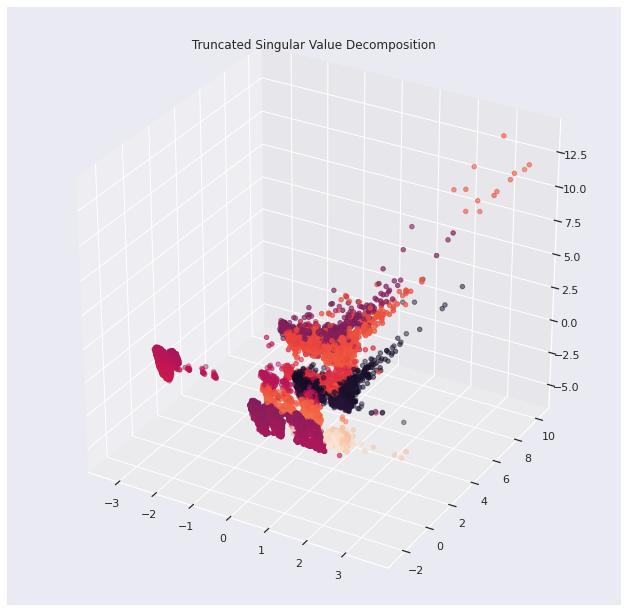

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (11, 11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(svd[:, 0], svd[:, 1], svd[:, 2], c = svd[:, 3])
ax.set_title(' Truncated Singular Value Decomposition ')

In [42]:
"""tsne = TSNE(learning_rate=100).fit_transform(data)
plt.figure(figsize=(10, 10))
plt.subplot(111, projection='3d')
plt.scatter(tsne[:, 0], tsne[:, 1], tsne[:, 2])"""

"tsne = TSNE(learning_rate=100).fit_transform(data)\nplt.figure(figsize=(10, 10))\nplt.subplot(111, projection='3d')\nplt.scatter(tsne[:, 0], tsne[:, 1], tsne[:, 2])"

# Pre-processing + Model

In [43]:
# Model Imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor


In [44]:
# Preprocessing Imports
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [45]:
# Scoring fonction
score_dir = 'scoring_program/'
path.append(score_dir)
from libscores import get_metric
metric_name, scoring_function = get_metric()
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [46]:
# Model List
voter1 = GradientBoostingRegressor()
voter2 = RandomForestRegressor()
voter3 = DecisionTreeRegressor()

model_name = [
    'KNeighbors',
    'SVR',
    'GaussianProcess',
    'ElasticNet',
    'DecisionTree',
    'RandomForest',
    'GradientBoosting',
    'Voting - GB - DT',
    'Voting - GB - DT - RF']

model_list = [
    KNeighborsRegressor(n_neighbors=5),
    svm.SVR(),
    GaussianProcessRegressor(), 
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(max_depth=9),
    GradientBoostingRegressor(),
    VotingRegressor(estimators=[('gb', voter1), ('lr', voter3)]),
    VotingRegressor(estimators=[('gb', voter1), ('rf', voter2), ('lr', voter3)])]

In [47]:
def score_data(data_test,Y,data_name) :
    res = {}
    perf = []
    X = data_test
    for i in range(len(model_list)) :
        model = model_list[i]
        s = cross_val_score(model, X, Y, cv=5, scoring=make_scorer(scoring_function))
        s = s.mean(), s.std() * 2
        print('CV score for the', model_name[i], '= %0.2f (+/- %0.2f)' %s)
        res[data_name+' - '+model_name[i]] = s[0]
        if s[0]<0:
            perf.append(0)
        else:
            perf.append(round(s[0],3))
    print('\n')
    return res,perf

In [48]:
preprocessing_name = [
    'Raw data',
    'Remove Outliers',
    'PCA',
    'SVD',
    'TSNE',
    'VarianceThreshold',
    'SelectKBest',
    'SelectFromModel'
]

# Shuffle data
shuffle = data.copy()
shuffle = shuffle.reindex(np.random.permutation(shuffle.index))
shuffle = shuffle.head(3000)
Y_raw = shuffle.iloc[:,-1]
print("Shuffle Complete")

# Remove Outliers
outliers = shuffle.copy()
outliers['outliers'] = pd.Series(LocalOutlierFactor(n_neighbors= 200).fit_predict(outliers), 
                                 index = outliers.index)
outliers = outliers[outliers['outliers'] == 1]
outliers = outliers.drop('outliers', 1)
Y = outliers.iloc[:,-1]
X = outliers.iloc[:,0:-1]
print("Remove Outlier Complete")

# Scaler
scaled_data = pd.DataFrame(StandardScaler().fit_transform(outliers))
Y_scaled = scaled_data.iloc[:,-1]
X_scaled = scaled_data.iloc[:,0:-1]
print("Scaler Complete")

# PCA
pca = PCA(n_components = 4).fit_transform(scaled_data)
print("PCA Complete")

# SVD
svd = TruncatedSVD(n_components=4).fit_transform(scaled_data)
print("SVD Complete")

# TSNE
tsne = TSNE().fit_transform(scaled_data)
print("TSNE Complete")

# Feature Selection
# VarianceThreshold
p = 0.9 
vart = VarianceThreshold(threshold=p*(1-p))
vart = vart.fit_transform(X)
print("VarianceThreshold Complete")

# SelectKBest
slck = SelectKBest(chi2, k=15)
slck = slck.fit_transform(X, Y)
print("SelectKBest Complete")

# SelectFromModel LassoCV
slcm = SelectFromModel(LassoCV(), max_features=10).fit(X_scaled, Y_scaled)
slcm = slcm.transform(X_scaled)
print("SelectFromModel LassoCV Complete")

Shuffle Complete
Remove Outlier Complete
Scaler Complete
PCA Complete
SVD Complete
TSNE Complete
VarianceThreshold Complete
SelectKBest Complete
SelectFromModel LassoCV Complete


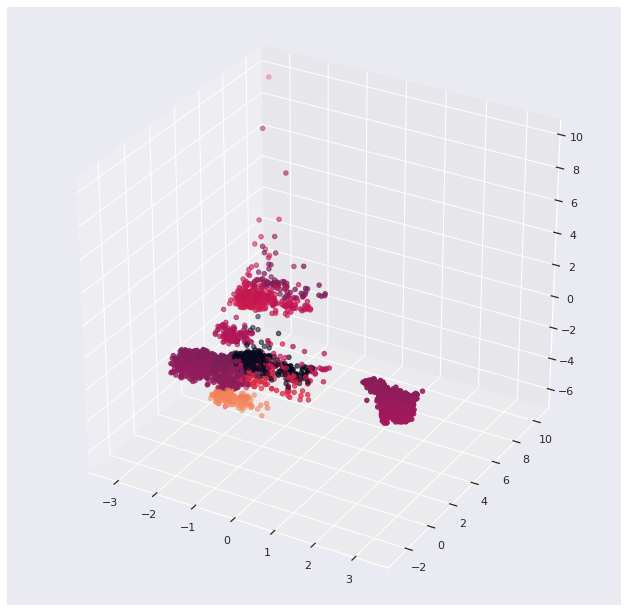

In [49]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (11, 11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(svd[:, 0], svd[:, 1], svd[:, 2], c = svd[:, 3])

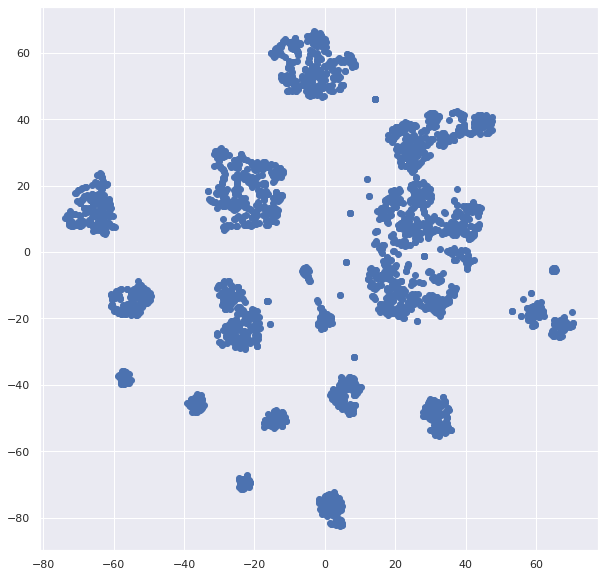

In [50]:
plt.figure(figsize=(10, 10))
plt.subplot()
plt.scatter(tsne[:, 0], tsne[:, 1])

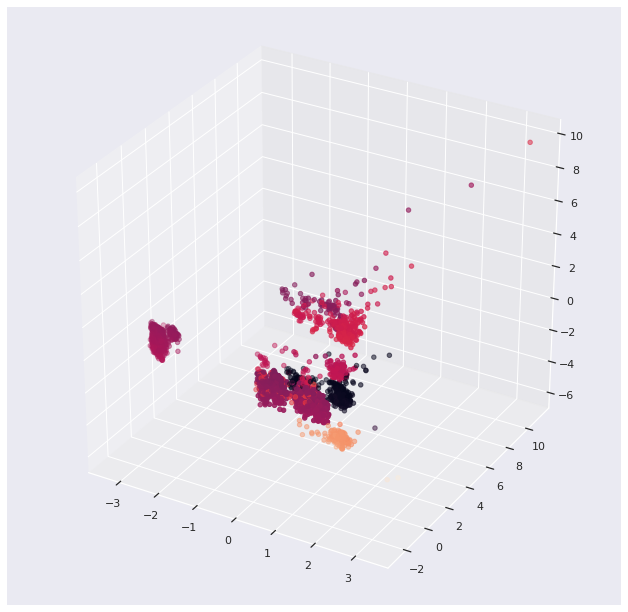

In [51]:
fig = plt.figure(figsize = (11, 11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca[:, 0], pca[:, 1], pca[:, 2], c = pca[:, 3])

In [52]:
res = {}
perf = np.ones((8,9))

print('score - data original: ')
shuffle = shuffle.iloc[:,:-1]
r,p = score_data(shuffle, Y_raw, 'data original')
res.update(r)
perf[0] = np.array(p)

print('score - data no outliers: ')
outliers = outliers.iloc[:,:-1]
r,p = score_data(outliers, Y, 'data no outliers')
res.update(r)
perf[1] = np.array(p)

print('score - data of PCA: ')
r,p = score_data(pca, Y, 'data of PCA')
res.update(r)
perf[2] = np.array(p)

print('score - data of SVD: ')
r,p = score_data(svd, Y, 'data of SVD')
res.update(r)
perf[3] = np.array(p)

print('score - data of TSNE: ')
r,p = score_data(tsne, Y, 'data of TSNE')
res.update(r)
perf[4] = np.array(p)

print('score - data of VarianceThreshold: ')
r,p = score_data(vart, Y, 'data of TSNE')
res.update(r)
perf[5] = np.array(p)

print('score - data of SelectKBest: ')
r,p = score_data(slck, Y, 'data of TSNE')
res.update(r)
perf[6] = np.array(p)

print('score - data of SelectFromModel LassoCV: ')
r,p = score_data(slcm, Y_scaled, 'data of TSNE')
res.update(r)
perf[7] = np.array(p)

score - data original: 
CV score for the KNeighbors = 0.57 (+/- 0.07)
CV score for the SVR = -0.01 (+/- 0.02)
CV score for the GaussianProcess = -2.59 (+/- 0.41)
CV score for the ElasticNet = 0.18 (+/- 0.07)
CV score for the DecisionTree = 0.88 (+/- 0.04)
CV score for the RandomForest = 0.93 (+/- 0.03)
CV score for the GradientBoosting = 0.92 (+/- 0.02)
CV score for the Voting - GB - DT = 0.92 (+/- 0.02)
CV score for the Voting - GB - DT - RF = 0.93 (+/- 0.02)


score - data no outliers: 
CV score for the KNeighbors = 0.57 (+/- 0.07)
CV score for the SVR = -0.01 (+/- 0.03)
CV score for the GaussianProcess = -2.61 (+/- 0.45)
CV score for the ElasticNet = 0.18 (+/- 0.07)
CV score for the DecisionTree = 0.89 (+/- 0.04)
CV score for the RandomForest = 0.94 (+/- 0.02)
CV score for the GradientBoosting = 0.92 (+/- 0.02)
CV score for the Voting - GB - DT = 0.93 (+/- 0.02)
CV score for the Voting - GB - DT - RF = 0.93 (+/- 0.02)


score - data of PCA: 
CV score for the KNeighbors = 0.63 (+/- 0

In [59]:
# Transform to Panda Dataframe
pca = pd.DataFrame(pca)
svd = pd.DataFrame(svd)
tsne = pd.DataFrame(tsne)
vart = pd.DataFrame(vart)
slck = pd.DataFrame(slck)
slcm = pd.DataFrame(slcm)
print("Transform to Panda Dataframe Complete")

Transform to Panda Dataframe Complete


In [60]:
print(max(res,key=res.get))

data of TSNE - RandomForest


In [61]:
print("Best Model Combination: " + max(res,key=res.get))

Best Model Combination: data of TSNE - RandomForest


In [62]:
def model_graphic(ax,Xtest, Ypredict ,colour,model_name='',dot='-'):
    """ Function that sends plot graphic of different targets preddcted by model named
         model_name.
         
         ax :   ax to plot
         Xtest: param enter 
         Ypredict: predicted values
         dot= type of dot
    """
    
    ax.plot(Xtest, Ypredict, dot,color=colour)
    ax.set_title(model_name)

In [63]:
com_perf = pd.DataFrame(perf, columns=model_name, index=preprocessing_name)
#com_perf = com_perf.round(2)
com_perf.round(2).style.background_gradient(cmap='Blues')

,KNeighbors,SVR,GaussianProcess,ElasticNet,DecisionTree,RandomForest,GradientBoosting,Voting - GB - DT,Voting - GB - DT - RF
Raw data,0.570000,0.000000,0.000000,0.180000,0.880000,0.940000,0.920000,0.920000,0.930000
Remove Outliers,0.570000,0.000000,0.000000,0.180000,0.890000,0.940000,0.920000,0.930000,0.940000
PCA,0.630000,0.010000,0.000000,0.080000,0.320000,0.580000,0.570000,0.560000,0.600000
SVD,0.630000,0.010000,0.000000,0.080000,0.310000,0.580000,0.570000,0.550000,0.590000
TSNE,0.770000,0.000000,0.000000,0.010000,0.660000,0.700000,0.530000,0.710000,0.750000
VarianceThreshold,0.570000,0.000000,0.000000,0.180000,0.880000,0.940000,0.920000,0.930000,0.940000
SelectKBest,0.720000,0.000000,0.000000,0.160000,0.880000,0.940000,0.920000,0.920000,0.930000
SelectFromModel,0.800000,0.740000,0.000000,0.000000,0.880000,0.940000,0.930000,0.930000,0.930000


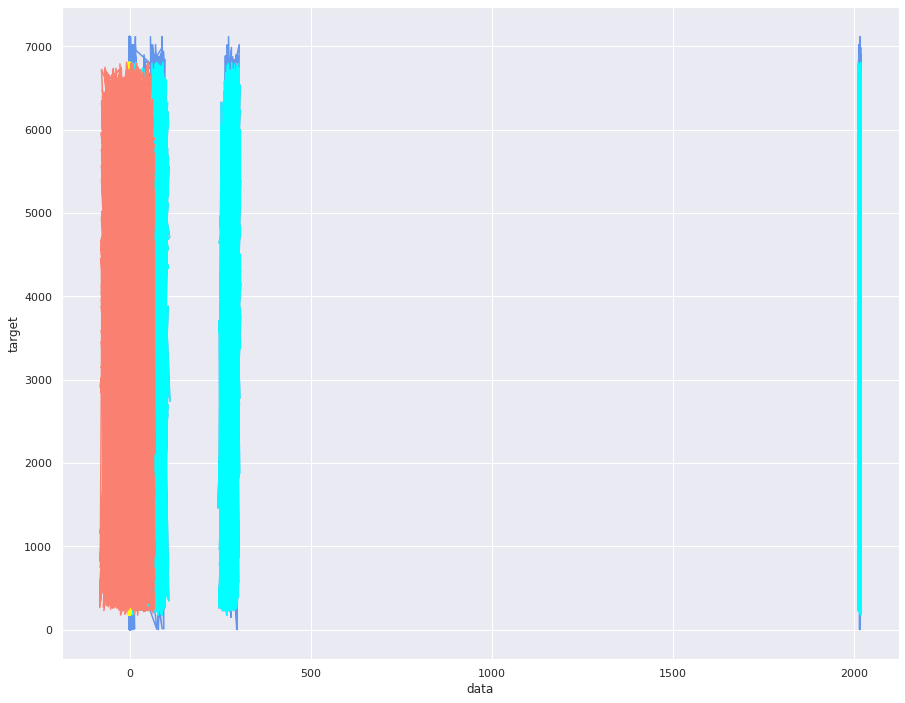

In [64]:
fig,ax =plt.subplots(figsize=(15,12))
model_graphic(ax,shuffle, Y_raw,'cornflowerblue')
model_graphic(ax,outliers,Y,'aqua')
model_graphic(ax,pca,Y,'orange')
model_graphic(ax,svd,Y,'yellow')
model_graphic(ax,tsne,Y,'salmon')

#plt.legend()
plt.xlabel("data")
plt.ylabel("target")
#plt.legend('shuffle, outliers, pca, svd,tsne')
plt.show()

In [65]:
def score_plots(com_score):
    com_score.plot(figsize=(15,8),title=" Method Scores in relation with preprocessing choices curves ")
    com_score.plot.bar(figsize=(15,10),title=" Method Scores in relation with preprocessing choices Bar graphic",label=False)
    com_score.plot.barh(figsize=(18,8),title=" Method Scores in relation with preprocessing choices horizontal bar plot",stacked=True)
    comaM = com_score[:].sort_values(model_name,ascending=False)[:]

    data_MIF = com_score.drop(columns=['GaussianProcess'])

    f = plt.figure(figsize=(19, 15))
    plt.matshow(data_MIF.corr(), fignum=f.number)
    plt.xticks(range(data_MIF.shape[1]), data_MIF.columns, fontsize=14, rotation=45)
    plt.yticks(range(data_MIF.shape[1]), data_MIF.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16);
    plt.show()

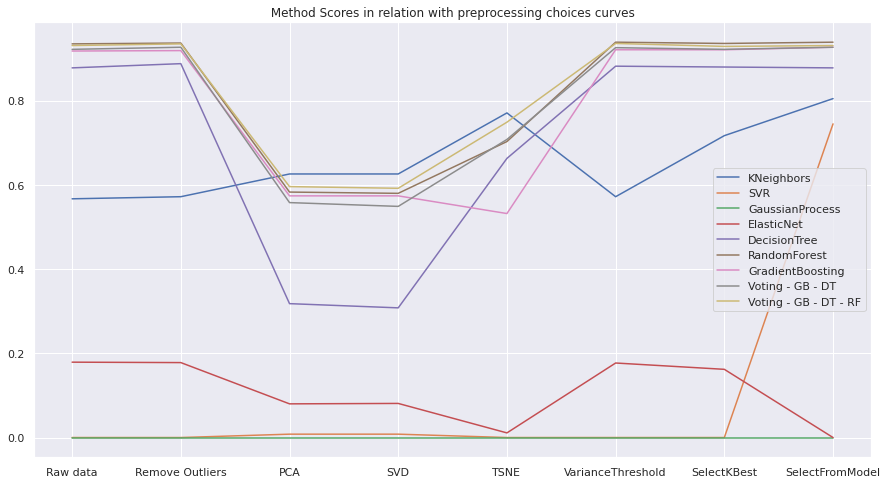

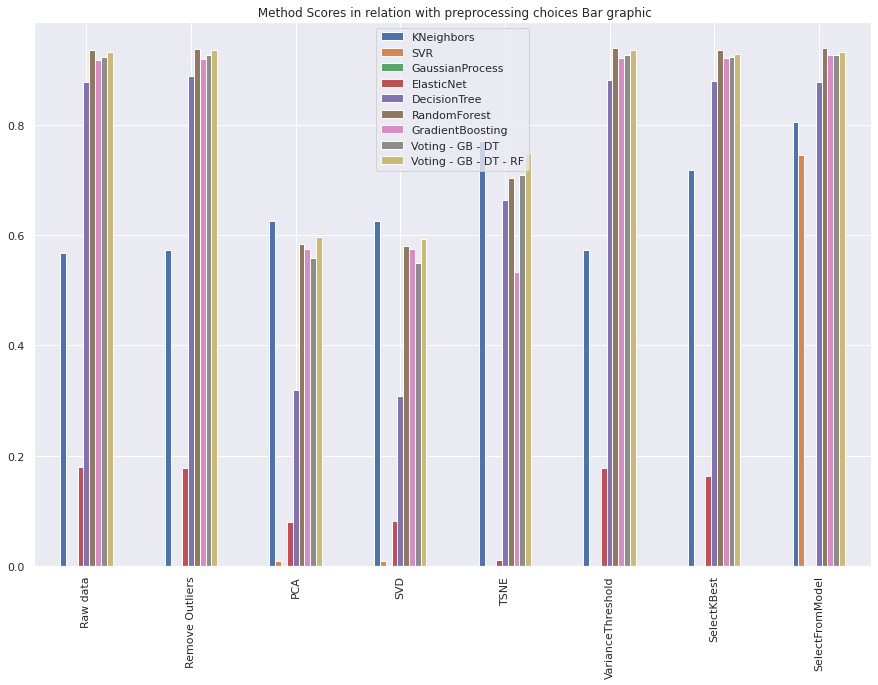

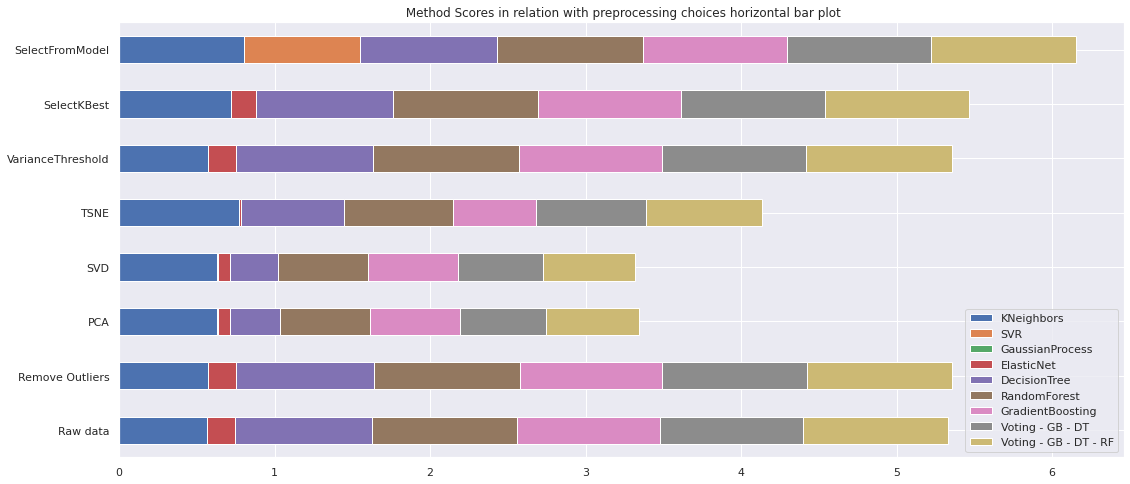

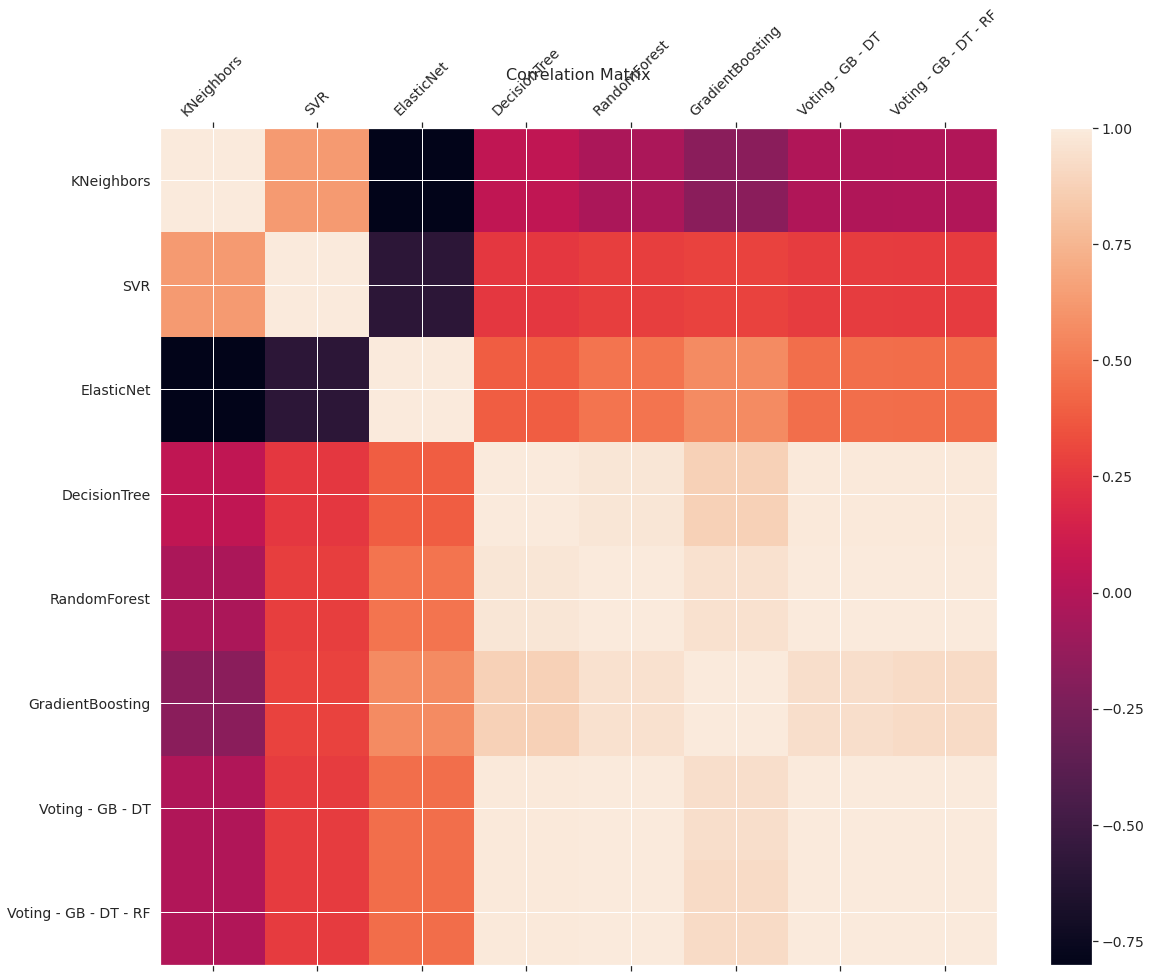

In [66]:
score_plots(com_perf)

<h2><span style ="color:green>"> SCORE GRAPHICS</span><h2> 

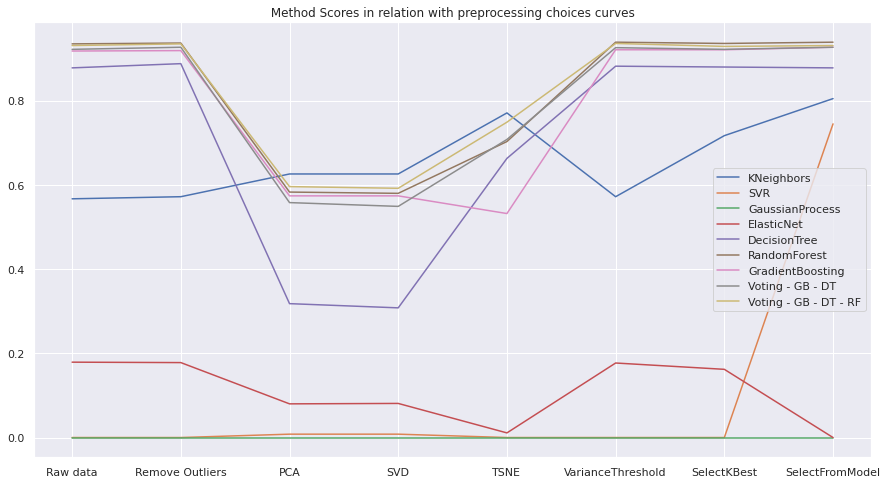

In [67]:

com_perf.plot(figsize=(15,8),title=" Method Scores in relation with preprocessing choices curves ")


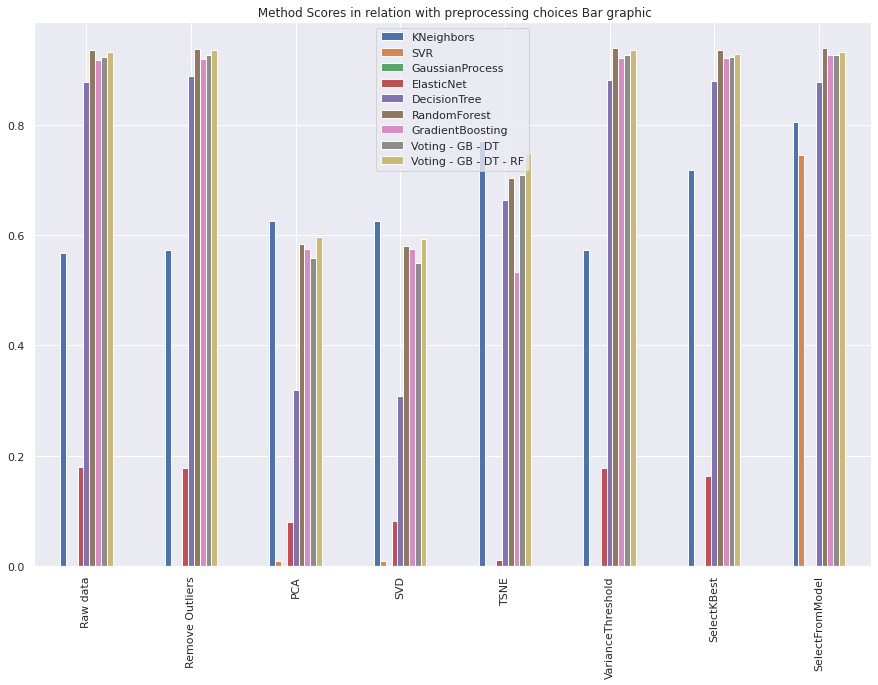

In [68]:
com_perf.plot.bar(figsize=(15,10),title=" Method Scores in relation with preprocessing choices Bar graphic",label=False)

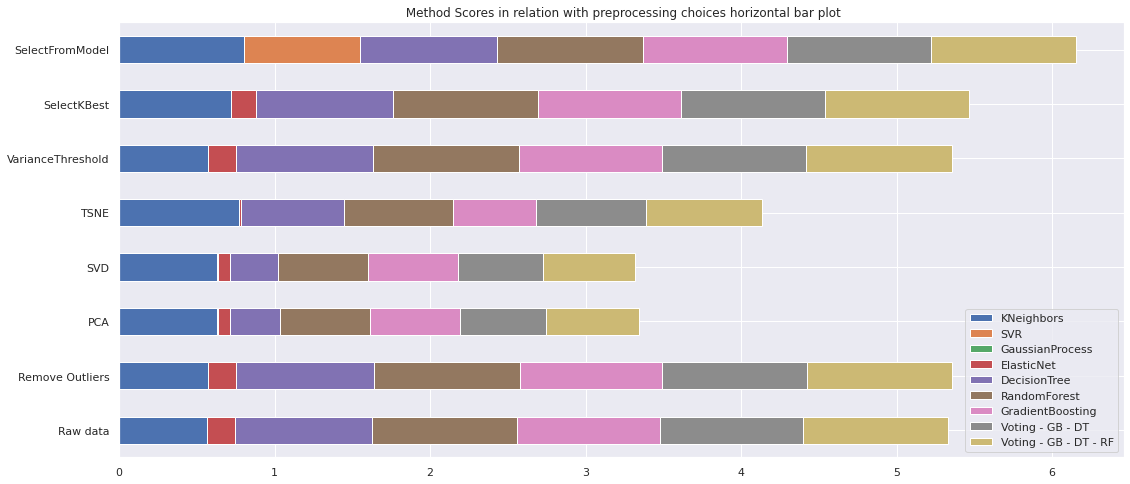

In [69]:
com_perf.plot.barh(figsize=(18,8),title=" Method Scores in relation with preprocessing choices horizontal bar plot",stacked=True)

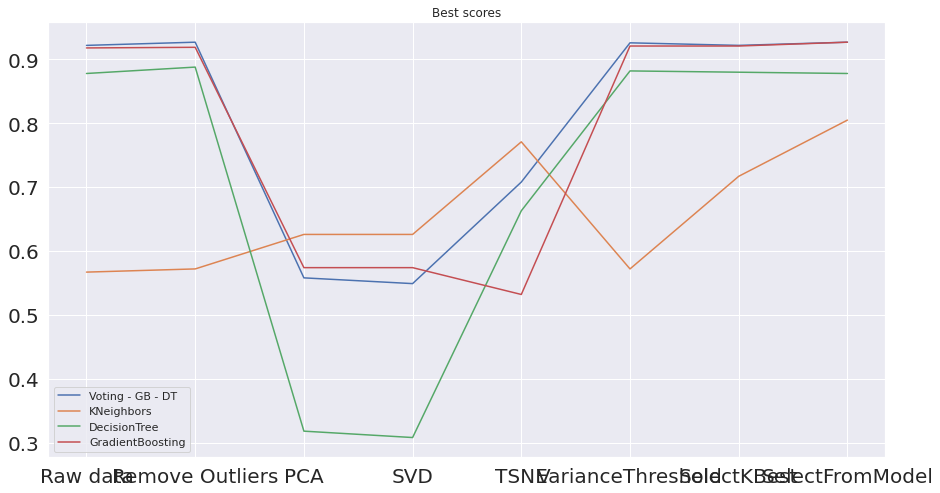

In [70]:


com_perf.filter(items=['Voting - GB - DT','Voting - GB - RF - DT','KNeighbors','DecisionTree','GradientBoosting']).plot(figsize=(15,8),title='Best scores', fontsize=20)



### Method Correlation Matrix


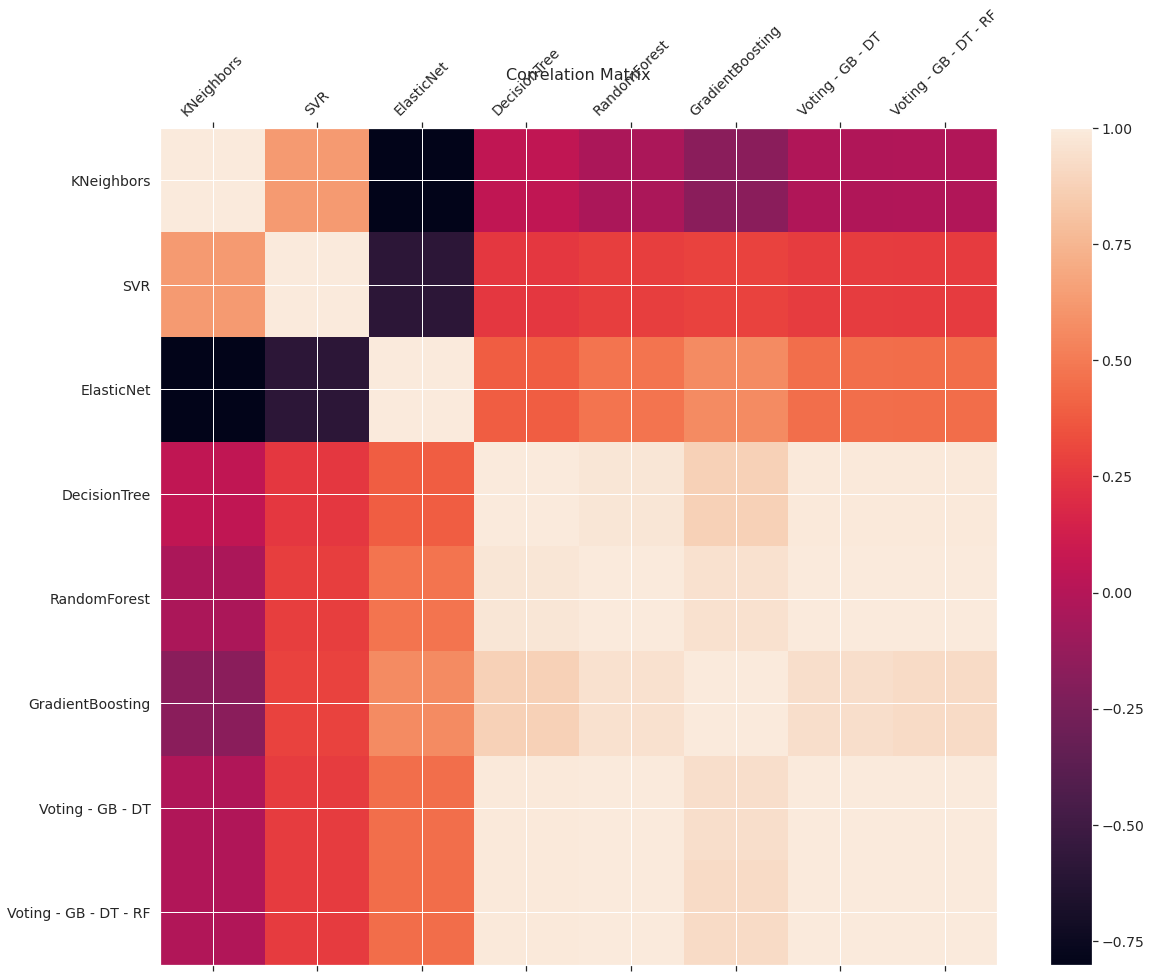

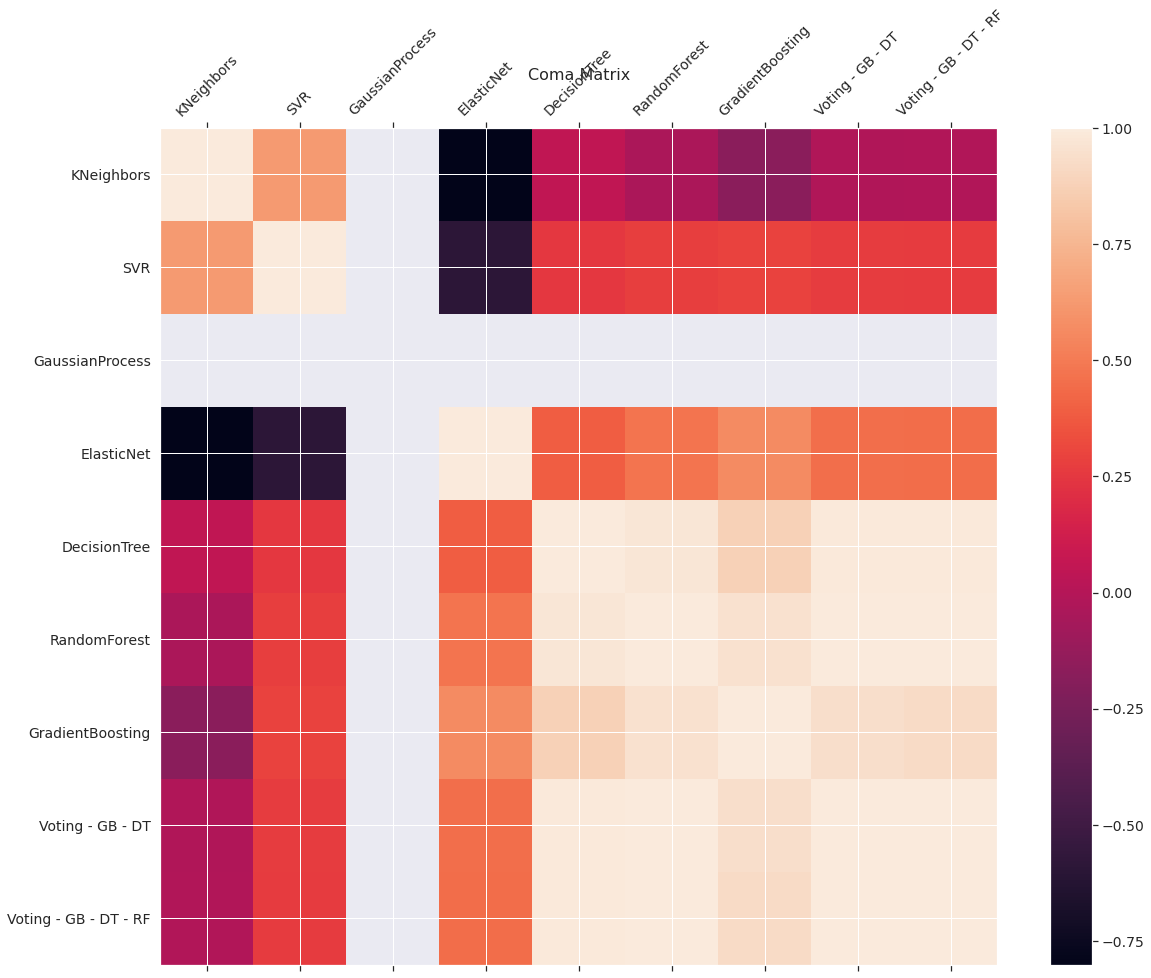

In [71]:

comaM = com_perf[:].sort_values(model_name,ascending=False)[:]

data_MIF = com_perf.drop(columns=['GaussianProcess'])

f = plt.figure(figsize=(19, 15))
plt.matshow(data_MIF.corr(), fignum=f.number)
plt.xticks(range(data_MIF.shape[1]), data_MIF.columns, fontsize=14, rotation=45)
plt.yticks(range(data_MIF.shape[1]), data_MIF.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()
f = plt.figure(figsize=(19, 15))
plt.matshow(comaM.corr(), fignum=f.number)
plt.xticks(range(comaM.shape[1]), comaM.columns, fontsize=14, rotation=45)
plt.yticks(range(comaM.shape[1]), comaM.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Coma Matrix', fontsize=16);


<div>
    <h2><span style="color:green">Scoring the results<span></h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

In [72]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: r2_metric


<div>
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [ ]:
data_df = pd.DataFrame(columns =['perf_tr', 'perf_te'])

X_train = D.data['X_train']
Y_train = D.data['Y_train']
X_entrainement,X_validation,Y_entrainement,Y_validation = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

metric_name, scoring_function = get_metric()

for i in range(len(model_list)):
    M = model_list[i]
    M.fit(X_entrainement,Y_entrainement)

    print(model_name[i])
    scores_train = cross_val_score(M, X_entrainement, Y_entrainement, cv=5, scoring=make_scorer(scoring_function))   
    scores_test = cross_val_score(M, X_validation, Y_validation, cv=5, scoring=make_scorer(scoring_function))

    data_df.loc[model_name[i]] = [scores_train.mean(), scores_test.mean()]

data_df[['perf_tr', 'perf_te']].plot.bar()
plt.ylabel(metric_name)
plt.title("performance des modèles en histogramme")


data_df[['perf_tr', 'perf_te']].plot.line()
plt.ylabel(metric_name)
plt.title("performance des modèles en courbe")
plt.show()

KNeighbors
SVR


In [ ]:
for i in range(len(model_list)):
    M = model_list[i]
    M.fit(X_entrainement,Y_entrainement)

    print(model_name[i])
    scores_train = cross_val_score(M, X_entrainement, Y_entrainement, cv=5, scoring=make_scorer(scoring_function))   
    scores_test = cross_val_score(M, X_validation, Y_validation, cv=5, scoring=make_scorer(scoring_function))

    data_df.loc[model_name[i]] = [scores_train.mean(), scores_test.mean()]

data_df[['perf_tr', 'perf_te']].plot.bar()
plt.ylabel(metric_name)
plt.title("performance des modèles en histogramme")


data_df[['perf_tr', 'perf_te']].plot.line()
plt.ylabel(metric_name)
plt.title("performance des modèles en courbe")
plt.show()

In [ ]:
d = pd.DataFrame(X_train)
d[-1] = Y_train
d

In [ ]:
from model import model

M = model()
trained_model_name = model_dir + data_name

X_train = D.data['X_train']
Y_train = D.data['Y_train']
if not(M.is_trained) : M.fit(X_train, Y_train)                 
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

In [ ]:
#Final Check
np.vstack((Y_hat_train,Y_train))

In [ ]:
#Whrite Result
from data_io import write
result_name = result_dir + data_name
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)

In [ ]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
# Here we think DecisionTreeRegressor might be the best option, but we can't still get a nice accuracy.
# We thought this might because we haven't found a better regressionor or it's because we havn't get a data from pre-processing groupe

In [ ]:
plt.figure(figsize=(15,9))
plt.scatter(Y_train, Y_hat_train, alpha =0.5, s = 1 )
plt.show()

## Code Prevision Graphic

In [ ]:

plt.figure(figsize = (20,10))
sns.distplot(Y_hat_train, bins=50,kde_kws={"color": "b", "lw": 3, "label": "Train studied"})
sns.distplot(Y_hat_valid, bins=50,kde_kws={"color": "orange", "lw": 3, "label": "Valid studied"})
sns.distplot(Y_hat_test, bins=50,kde_kws={"color": "g", "lw": 3, "label": "test studied"})
plt.title('The distribution of traffic volume predictions, calculated')
plt.show()

<div>
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

<div>
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [ ]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

<div>
Also test the scoring program:
    </div>

In [ ]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

<div>
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)